# Resolution with Cross Validation

### Importing libs

In [27]:
import pandas as pd
import numpy as np

#from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Loading dataset

In [28]:
cols = ['ID', 'label', 'mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness',
        'mean concavity','mean concave points','mean symmetry','mean fractal dimension','radius error','texture error',
        'perimeter error','area error','smoothness error','compactness error','concavity error','concave points error',
        'symmetry error','fractal dimension error','worst radius','worst texture','worst perimeter','worst area',
        'worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry',
        'worst fractal dimension']
df = pd.read_csv('wdbc.data', names=cols)

In [29]:
df.head()

,ID,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
df.shape

(569, 32)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                         569 non-null int64
label                      569 non-null object
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non

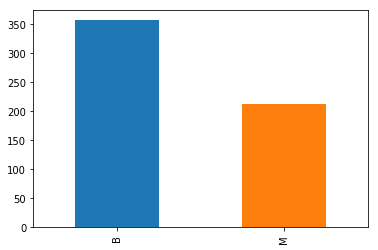

In [32]:
# Showing the difference and why this need be stratified
df['label'].value_counts().plot(kind='bar')

## Droping ID and Converting label to numeric values

In [33]:
df = df.drop('ID', axis=1)

In [34]:
df.head()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
le = LabelEncoder()
df['label'] = le.fit_transform(df.values[:, 0])

In [36]:
df[:30]

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


## Spliting data to train, test with Stratification

In [37]:
X = df.values[:, 1:]
y = df.values[:, 0]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [40]:
#pipe_lr = make_pipeline(StandardScaler(),
#                       PCA(n_components=2),
#                       Perceptron(random_state=42))
#pipe_lr.fit(X_train,y_train)
#y_pred = pipe_lr.predict(X_test)
#print('Accuracy Test: %.3f' % pipe_lr.score(X_test, y_test))

## Using GridSearchCV to test various hyperparameters already stratified with cross validation 

In [41]:
Perceptron().get_params

<bound method BaseEstimator.get_params of Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)>

In [55]:
# using shuffle and random_random state in a stratified
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

pipe_perc = make_pipeline(StandardScaler(), Perceptron(max_iter=1000, tol = 1e-3)) 
                                   #these two params are seted for dont have warnings

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0]

param_grid = [{'perceptron__alpha': param_range, 
               'perceptron__penalty': ['l1']},
              {'perceptron__alpha': param_range, 
               'perceptron__penalty': ['l2']},
              {'perceptron__alpha': param_range, 
               'perceptron__penalty': ['elasticnet']},
              {'perceptron__alpha': param_range,
               'perceptron__penalty': [None]}]

gs = GridSearchCV(estimator=pipe_perc, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=cv,
                  n_jobs=-1,
                  return_train_score=True) # the return_train_score set here, is just for not to have warnings below

gs = gs.fit(X_train, y_train)
print('Best score: ' , gs.best_score_)
print('Best params: ', gs.best_params_)

Best score:  0.9582417582417583
Best params:  {'perceptron__alpha': 0.0001, 'perceptron__penalty': 'l2'}


C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
colunas = ['param_perceptron__alpha', 'param_perceptron__penalty', 'mean_train_score', 'mean_test_score']

In [44]:
pd.DataFrame(gs.cv_results_)[colunas].sort_values(by="mean_test_score", ascending=False)

,param_perceptron__alpha,param_perceptron__penalty,mean_train_score,mean_test_score
3,0.1,l1,0.918690,0.923077
0,0.0001,l1,0.918690,0.920879
27,0.0001,None,0.918690,0.920879
34,50,None,0.918690,0.920879
33,10,None,0.918690,0.920879
32,5,None,0.918690,0.920879
31,1,None,0.918690,0.920879
30,0.1,None,0.918690,0.920879
29,0.01,None,0.918690,0.920879
28,0.001,None,0.918690,0.920879


### Trainning and predict with the best model finded

In [50]:
gs.best_estimator_.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('perceptron',
  Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
        fit_intercept=True, max_iter=1000, n_iter=None, n_iter_no_change=5,
        n_jobs=None, penalty='l2', random_state=0, shuffle=True, tol=0.001,
        validation_fraction=0.1, verbose=0, warm_start=False))]

In [56]:
best_model = gs.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print('Test accuracy: %.3f' % best_model.score(X_test, y_test))

Test accuracy: 0.956
